In [ ]:
# !pip install geopandas 
# !pip install mapclassify
# !pip install descartes

In [1]:
import os

import pandas as pd
import geopandas as gpd

import matplotlib
%matplotlib inline

# Learning objectives

1. Understand geospatial data in Python
2. Download map of USA and plot it; do the same thing with States and California counties
3. Learn how to join population data with the spatial-geometric data

# Introduction to geospatial data in Python

"[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting."

![geo1](../../Img/Geo1.png)

![geo2](../../Img/Geo2.png)

![geo3](../../Img/Geo3.png)

![geo4](../../Img/Geo4.png)

![geo5](../../Img/Geo5.png)

![geo6](../../Img/Geo6.png)

![geo7](../../Img/Geo7.png)

![geo8](../../Img/Geo8.png)

![geo9](../../Img/Geo9.png)

![geo10](../../Img/Geo10.png)

![geo11](../../Img/Geo11.png)

![geo12](../../Img/Geo12.png)

# DIVA (Data-Interpolating Variational Analysis)

[DIVA-GIS](https://www.diva-gis.org/gdata) is an excellent website for downloading free geographic (GIS) data for any country in the world. The [DIVA-GIS software manual](https://www.diva-gis.org/docs/DIVA-GIS_manual_7.pdf) is worth a read as well. 

### USA example
1. Create a folder named USA (or whatever country/state/region you are working with) in your DIGHUM101-2019 directory (this has already been done for you)
2. Visit [DIVA-GIS](https://www.diva-gis.org/gdata) and select "United States" from the "Country" dropdown menu
3. Select "Administrative Areas" from the "Subject" dropdown menu
4. Click "OK"
5. Click "Download"

In [ ]:
# Check the working director

%pwd

In [2]:
# Read in the data as a GeoDataFrame
# Note the format for reading a zip file.

usa = gpd.read_file("USA_adm.zip")
print(type(usa))
usa

<class 'geopandas.geodataframe.GeoDataFrame'>


,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,244,USA,United States,238,USA,United States,UNITED STATES,United States of America,United States,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-155.84998 20.26800, -155.8494..."


In [ ]:
usa.columns

In [ ]:
usa.dtypes

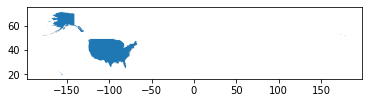

In [3]:
# Plot it!
usa.plot();

# State boundaries

Now we need to get the state boundaries to overlay on this map.

In [ ]:
%pwd

In [14]:
# Read the file

state_boundaries = gpd.read_file("../../Data/Geo/us_states.zip")
print(state_boundaries.shape)
state_boundaries.head()

(56, 4)


,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [7]:
app_states = ["KY", "VA", "TN", "WV"]

In [10]:
app_states_df = state_boundaries.loc[state_boundaries["ABBREV"].isin(["KY", "VA", "TN", "WV"])]
app_states_df

,STATE,GEOID,ABBREV,geometry
30,West Virginia,54,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
35,Kentucky,21,KY,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
48,Tennessee,47,TN,"POLYGON ((-90.31030 35.00429, -90.30988 35.009..."
50,Virginia,51,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."


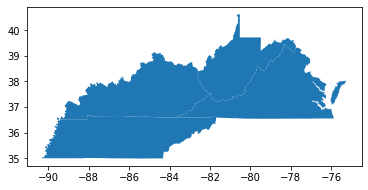

In [12]:
app_states_df.plot();

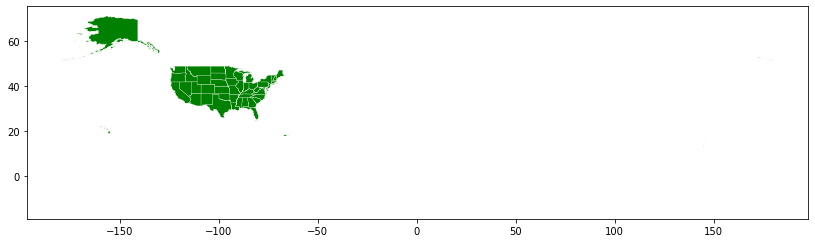

In [5]:
# Plot the state boundaries
state_boundaries.plot(
    
    # Width of boundary line
    linewidth=0.25, 
    
    # Boundary color line
    edgecolor='white', 
    
    # State color
    facecolor='green',
    
    # Figure size
    figsize=(14,10)
);

In [ ]:
state_boundaries.cx?

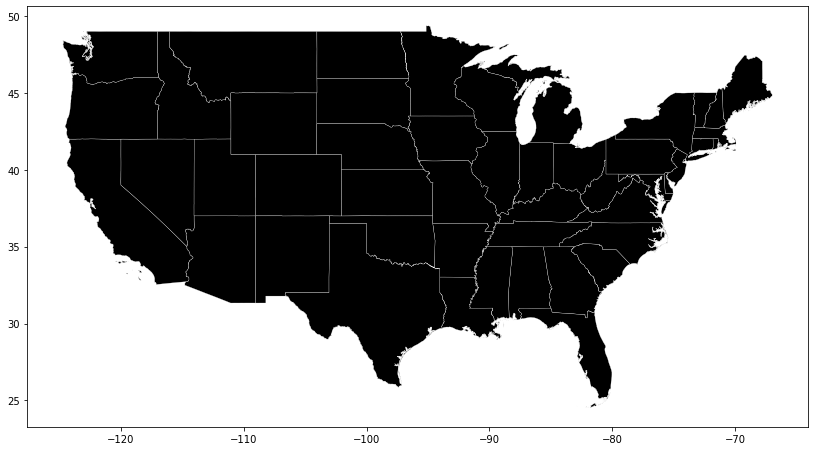

In [6]:
# Spatial subset of the contiguous US (zoom in!)
state_boundaries.cx[-130:-70,25:50].plot(linewidth=0.25, 
                                         edgecolor='white', 
                                         facecolor='black', 
                                         figsize=(14,10));

# Individual county polygons

To get individual state county boundaries, visit https://www.census.gov/geographies/mapping-files/2018/geo/carto-boundary-file.html

We want the file "cb_2018_us_county_5m.zip" What is California's STATEFP code? 

In [ ]:
counties = gpd.read_file("zip://../../Data/Geo/cb_2018_us_county_5m.zip")
print(counties.shape)
counties.head()

In [ ]:
# Just California...
cal_counties = counties.loc[counties["STATEFP"] == "06"]
print(cal_counties.shape)
cal_counties.head()

In [ ]:
# Pull the state info for California
state_boundaries.head()

In [ ]:
# Subset to California

california = state_boundaries.loc[state_boundaries["ABBREV"] == "CA"]
california

In [ ]:
# Plot it
california.plot(); 

Visi the [Census Bureau website](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html)to get information about these counties. 

In [ ]:
pop = pd.read_csv("../../Data/Geo/DEC_10_SF1_GCTPH1.ST05_with_ann.csv")
print(pop.shape)
pop.head()

In [ ]:
# Add a zero to the new GEOID column
pop["GEOID"] = ["0" + str(x) for x in pop["Target Geo Id2"]]
pop.head()

# Do the join!

Now we can combine `cal_counties` and `pop` because they have the same number of rows. 

In [ ]:
pop.head()

In [ ]:
cal_counties.head()

In [ ]:
# cal_counties
# pop
geo_pop = cal_counties.merge(pop, on = "GEOID", how = "left")
print(geo_pop.shape)
geo_pop.head()

# Plot

In [ ]:
geo_pop.plot(
    # Which column to visualize?
    column = "Housing units", 
    
    # Which color palette to use?
    cmap = "Reds", 
    
    # What color should be used to separate the counties?
    edgecolor = "black", 
    
    # Width of the county boundary lines
    linewidth = 0.5, 
    
    # Change figure size
    figsize = (10, 10),
    
    # Add legend
    legend = True,
    
    # What do the different classifier schemes do? 
    scheme = "quantiles",
    k = 10
);

Visit the [this page](https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html) and pass in different schemes. How does `scheme = "Equal_Interval"` differ from "quantiles"? 

> HINT: This is how people [lie with maps](https://www.amazon.com/How-Lie-Maps-Mark-Monmonier/dp/0226534219)!

[Learn more here](https://github.com/pysal/mapclassify).

In [ ]:
geo_pop.plot(column = "Density per square mile of land area - Population", 
             cmap = "Greens", 
             edgecolor = "black", 
             linewidth = 0.1, 
             scheme = "Quantiles", 
             legend = True, 
             figsize = (6,6)
            );

# Going further

See if you can get the Geospatial Fundamentals in Python workshop materials to work!

https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python